# IMPORT THE LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report,confusion_matrix
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.model_selection import train_test_split

# READ THE DATASET

In [2]:
data=pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# DATA ANALYSIS

In [3]:
data.shape

(284807, 31)

In [4]:
data["Class"].unique()

array([0, 1], dtype=int64)

0 FOR "NO FRAUD" AND 1 FOR FRAUD

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data.duplicated().sum()

1081

THERE ARE 1081 DUPLICATE ROWS.

#### BOXPLOT

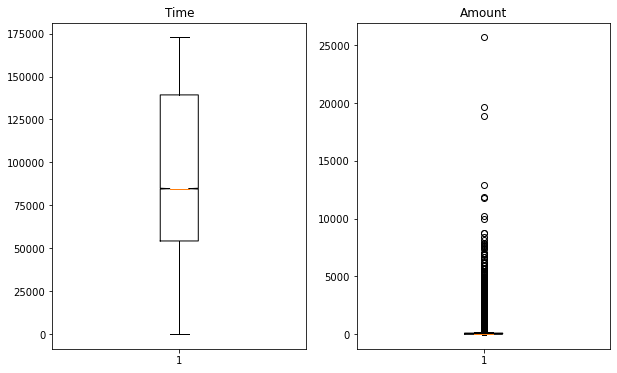

In [8]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.boxplot(x=data["Time"],notch=True)
plt.title("Time")
plt.subplot(1,2,2)
plt.boxplot(x=data["Amount"],notch=True)
plt.title("Amount")
plt.show()

TOO MANY OUTLIERS IN AMOUNT

#### CORRELATION MATRIX

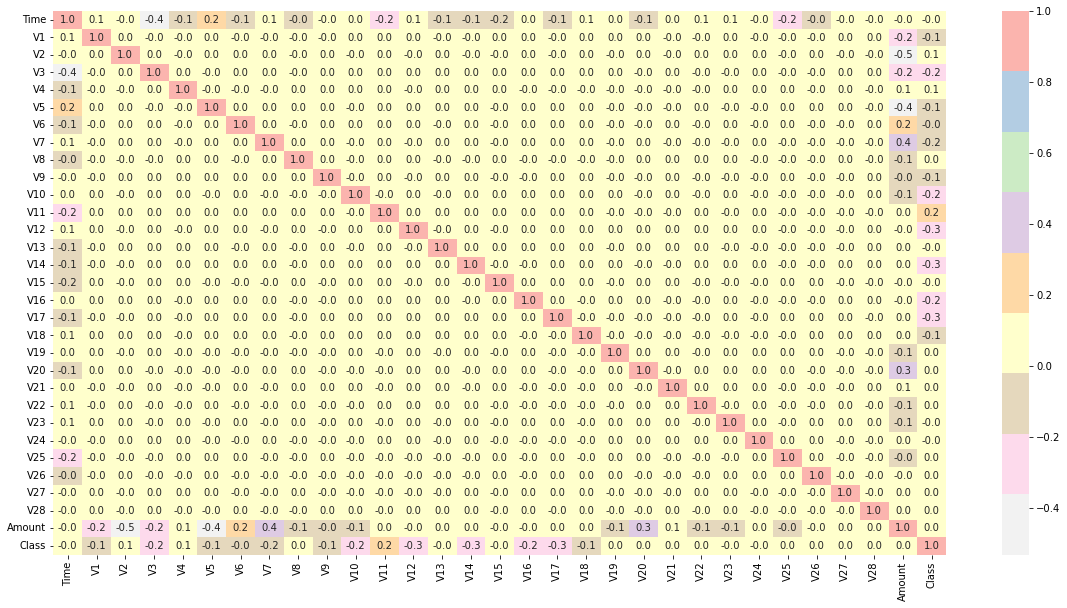

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),fmt=".1f",annot=True,cmap='Pastel1_r')
plt.show()

#### COUNTPLOT

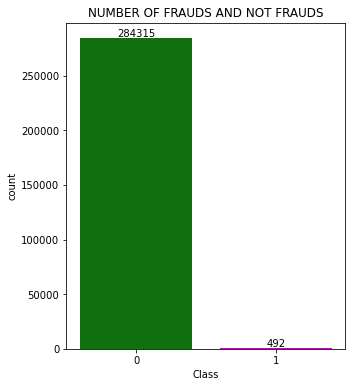

In [10]:
plt.figure(figsize=(5,6))
plot=sns.countplot(x=data["Class"],palette=["g","m"])
plot.bar_label(plot.containers[0])
plt.title("NUMBER OF FRAUDS AND NOT FRAUDS")
plt.show()

# DATA PREPROCESSING

#### REMOVING DUPLICATE ROWS

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.duplicated().sum()

0

In [15]:
data.shape

(283726, 31)

# FEATURE ENGINEERING

In [16]:
features=data.drop("Class",axis=1)
target=data["Class"]

In [17]:
features.shape

(283726, 30)

In [18]:
target.shape

(283726,)

#### MUTUAL INFORMATION GAIN

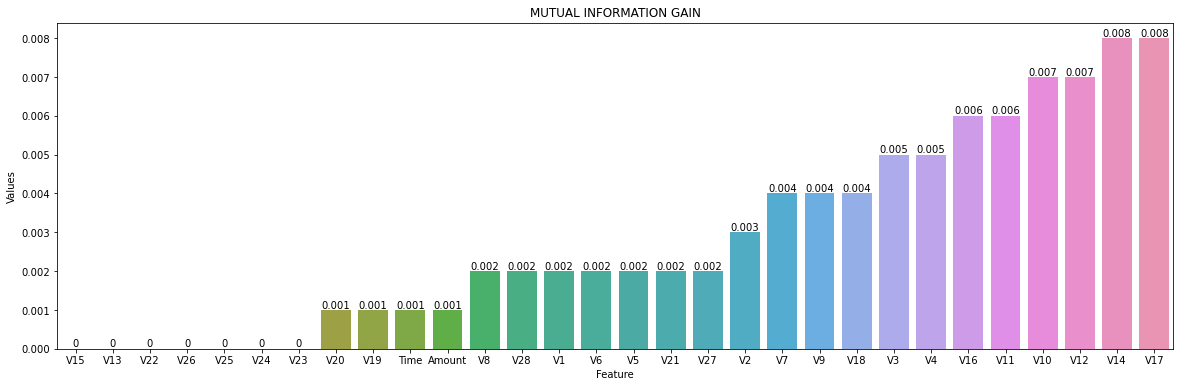

In [19]:
info=mutual_info_classif(features,target)
mutual_info=pd.Series(info)
mutual_info.index=features.columns
df=pd.DataFrame({"Feature":mutual_info.index,"Values":mutual_info})
df.sort_values(ascending=True,by="Values",inplace=True)
df["Values"]=df["Values"].round(3)
plt.figure(figsize=(20,6))
bar=sns.barplot(x="Feature",y="Values",data=df)
bar.bar_label(bar.containers[0])
plt.title("MUTUAL INFORMATION GAIN")
plt.show()

#### SELECTING FEATURES ACCORDING TO MUTUAL INFORMATION GAIN

In [20]:
features=data[["V3","V4","V10","V11","V12","V14","V16","V17"]]

In [21]:
features.head()

,V3,V4,V10,V11,V12,V14,V16,V17
0,2.536347,1.378155,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971
1,0.166480,0.448154,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805
2,1.773209,0.379780,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969
3,1.792993,-0.863291,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093
4,1.548718,0.403034,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033


# SPLITTING THE DATA INTO TRAINING AND TEST SETS

In [22]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=30)

In [23]:
x_train.shape

(198608, 8)

In [24]:
x_test.shape

(85118, 8)

# MODEL TRAINING

#### LOGISTIC REGRESSION

In [25]:
model=LogisticRegression(max_iter=100000)

In [26]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=100000)

In [27]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

# PERFORMANCE EVALUATION

#### ACCURACY

In [28]:
train_accuracy=accuracy_score(y_train,train_pred)
print("Training Accuracy: ",round(train_accuracy,2))

Training Accuracy:  1.0


In [29]:
test_accuracy2=accuracy_score(test_pred,y_test)
print("Test Accuracy- ",test_accuracy2.round(2))

Test Accuracy-  1.0


#### CLASSIFICATION REPORT

In [30]:
report=classification_report(y_test,test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84992
           1       0.89      0.63      0.73       126

    accuracy                           1.00     85118
   macro avg       0.94      0.81      0.87     85118
weighted avg       1.00      1.00      1.00     85118



#### CONFUSION MATRIX

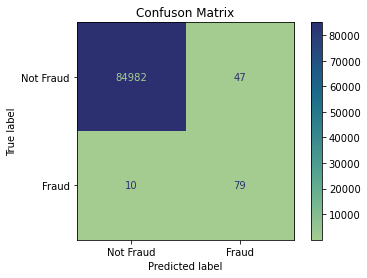

In [31]:
matrix2=confusion_matrix(test_pred,y_test)
cm2=ConfusionMatrixDisplay(matrix2,display_labels=["Not Fraud","Fraud"])
cm2.plot(cmap="crest")
plt.title("Confuson Matrix")
plt.show()

# TESTING THE MODEL

In [281]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")
v3=float(input("Enter value for Feature V3: "))
v4=float(input("Enter value for Feature V4: "))
v10=float(input("Enter value for Feature V10: "))
v11=float(input("Enter value for Feature V11: "))
v12=float(input("Enter value for Feature V12: "))
v14=float(input("Enter value for Feature V14: "))
v16=float(input("Enter value for Feature V16: "))
v17=float(input("Enter value for Feature V17: "))
new_data=[[v3,v4,v10,v11,v12,v14,v16,v17]]
pred=model.predict(new_data)
if(pred==0):
    print("No Fault")
else:
    print("Fault")

Enter value for Feature V3: 0.76435
Enter value for Feature V4: -0.897654
Enter value for Feature V10: 0.675432
Enter value for Feature V11: 0.887659
Enter value for Feature V12: -0.876543
Enter value for Feature V14: -0.7890654
Enter value for Feature V16: 0.677854
Enter value for Feature V17: -0.577898
No Fault
